In [2]:
# Import numpy and pandas
import numpy as np
import pandas as pd

In [3]:
# Importing loan csv as a dataframe
df = pd.read_csv('./loan.csv', low_memory=False)

In [52]:
# Analysing the head of the dataframe to get a high level understanding of the data
pd.set_option('display.max_columns', None)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [53]:
# Displaying the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [54]:
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [55]:
dict(df.dtypes)

{'id': dtype('int64'),
 'member_id': dtype('int64'),
 'loan_amnt': dtype('int64'),
 'funded_amnt': dtype('int64'),
 'funded_amnt_inv': dtype('float64'),
 'term': dtype('O'),
 'int_rate': dtype('O'),
 'installment': dtype('float64'),
 'grade': dtype('O'),
 'sub_grade': dtype('O'),
 'emp_title': dtype('O'),
 'emp_length': dtype('O'),
 'home_ownership': dtype('O'),
 'annual_inc': dtype('float64'),
 'verification_status': dtype('O'),
 'issue_d': dtype('O'),
 'loan_status': dtype('O'),
 'pymnt_plan': dtype('O'),
 'url': dtype('O'),
 'desc': dtype('O'),
 'purpose': dtype('O'),
 'title': dtype('O'),
 'zip_code': dtype('O'),
 'addr_state': dtype('O'),
 'dti': dtype('float64'),
 'delinq_2yrs': dtype('int64'),
 'earliest_cr_line': dtype('O'),
 'inq_last_6mths': dtype('int64'),
 'mths_since_last_delinq': dtype('float64'),
 'mths_since_last_record': dtype('float64'),
 'open_acc': dtype('int64'),
 'pub_rec': dtype('int64'),
 'revol_bal': dtype('int64'),
 'revol_util': dtype('O'),
 'total_acc': dtyp

In [57]:
df['mths_since_last_major_derog'].value_counts()

Series([], Name: mths_since_last_major_derog, dtype: int64)

In [4]:
# List of columns having NULL values

column_df = pd.DataFrame({
    'columns': df.columns,
    'missing_perc': (df.isnull().sum() * 100 / len(df)).round(1)
})

column_df = column_df.reset_index(drop=True)

# null columns: column_df[column_df.missing_perc == 100.0]

print("Count of NULL columns", (column_df[column_df.missing_perc == 100.0]).count().columns)


Count of NULL columns 54


In [5]:
# removing null columns from df

null_columns = (column_df[column_df.missing_perc == 100.0])['columns']

df = df.drop(null_columns, axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [76]:
# remove columns that have all values same as it does not influence results
# remove columns that do not have a business impact etc

In [6]:
cl_unique=df.nunique()
cl=cl_unique[cl_unique.values == 1]
df.drop(columns = list(cl.index), inplace=True)
df.shape

(39717, 48)

The company wants to identify the risk of the applicants, so the values created after approval of loan are not useful for the analysis. the fields which are unique for each applicant like id, member_id, url are also not useful for the analysis. Zipcode values are not fully available and hence this is also not much useful here. Dropping these values help us to monitor the important values closer. 

In [7]:
del_cols = ["id","member_id","url","zip_code","out_prncp","out_prncp_inv","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"]
df.drop(columns= del_cols, inplace=True)
df.shape

(39717, 33)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  int64  
 1   funded_amnt             39717 non-null  int64  
 2   funded_amnt_inv         39717 non-null  float64
 3   term                    39717 non-null  object 
 4   int_rate                39717 non-null  object 
 5   installment             39717 non-null  float64
 6   grade                   39717 non-null  object 
 7   sub_grade               39717 non-null  object 
 8   emp_title               37258 non-null  object 
 9   emp_length              38642 non-null  object 
 10  home_ownership          39717 non-null  object 
 11  annual_inc              39717 non-null  float64
 12  verification_status     39717 non-null  object 
 13  issue_d                 39717 non-null  object 
 14  loan_status             39717 non-null

In [8]:
# dropping the columns having null values more than 75%
null_val=df.isnull().sum()
df.drop(columns=list(null_val[null_val.values >10000].index), inplace=True)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_title             37258 non-null  object 
 9   emp_length            38642 non-null  object 
 10  home_ownership        39717 non-null  object 
 11  annual_inc            39717 non-null  float64
 12  verification_status   39717 non-null  object 
 13  issue_d               39717 non-null  object 
 14  loan_status           39717 non-null  object 
 15  purpose            

In [9]:
#Int_rate and revol_util has percentage in the values, lets remove percentage
df['int_rate'] = df['int_rate'].str.rstrip('%')
df['revol_util'] = df['revol_util'].str.rstrip('%')

In [10]:
#formatting emp_length column to numeric to use it for analysis
df['emp_length']= df.emp_length.str.extract('(\d+)')

In [105]:
#dropping off the null values as the count is very less comapred to the total data frame
df.emp_length.isnull().sum()

0

In [27]:
df=df[~(df['emp_length'].isnull())]
df=df[~(df['emp_title'].isnull())]

In [12]:
#convert amount columns to numeric data to find correlation
cols=['loan_amnt', 'funded_amnt', 'int_rate', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'emp_length']
df[cols] = df[cols].apply(pd.to_numeric)

In [13]:
#extracting month and year from issue_d
df.issue_d= pd.to_datetime(df.issue_d, format= '%b-%y')
df['year']= df['issue_d'].dt.year
df['month']= df['issue_d'].dt.month

In [108]:
#dropping account status with current as the ongoing loan application will not be of much use to our analysis.
#converting loan_status to numeric: assigning 1 for defaulted loans and 0 for paid off
df['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [14]:
df = df[~(df['loan_status']== 'Current')]
df.shape

(37544, 31)

In [15]:
loan_status_percent=df['loan_status'].value_counts(normalize=True)
loan_status_percent

Fully Paid     0.856195
Charged Off    0.143805
Name: loan_status, dtype: float64

In [24]:
df['loan_status_num'] = df['loan_status'].apply(lambda x:1 if x=='Charged Off' else 0)


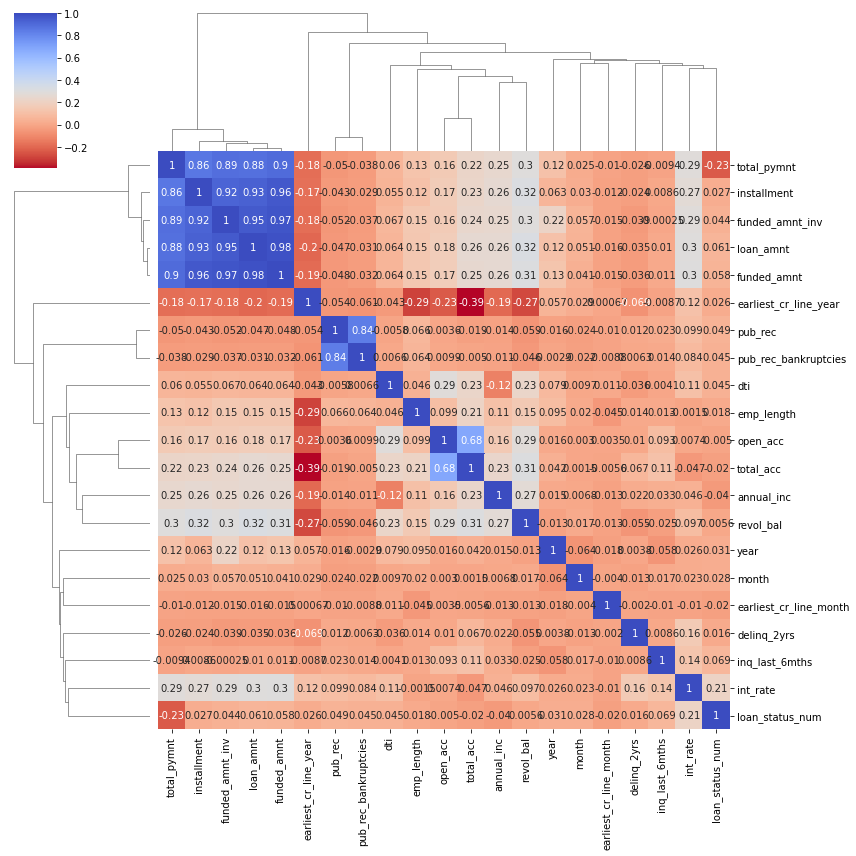

In [49]:
#Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.clustermap(data=df.corr(), cmap='coolwarm_r', figsize=(12,12), annot=True)
plt.show()

In [21]:
pd.set_option('display.max_columns', None)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,pub_rec_bankruptcies,year,month
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,5863.155187,0.0,2011,12
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,1008.710000,0.0,2011,12
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,3005.666844,0.0,2011,12
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21,37,12231.890000,0.0,2011,12
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,Nov-04,3,9,0,7963,28.30,12,5632.210000,0.0,2011,12


In [31]:
df.pub_rec_bankruptcies.isnull().sum()

654

In [30]:
#finding missing values in the columns
missing_values = round(100*(df.isnull().sum()/len(df.loan_amnt)))
missing_values[missing_values !=0]

pub_rec_bankruptcies    2.0
dtype: float64

In [32]:
#dropping the misisng values in prublic record Bankruptcies
df=df[~df.pub_rec_bankruptcies.isnull()]

In [33]:
df.shape

(35482, 32)

In [34]:
#Cleaning term column and converting to numberic
df['term']= df.term.apply(lambda x:x.split()[0])
df.term.value_counts(normalize=True)

36    0.74604
60    0.25396
Name: term, dtype: float64

In [36]:
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line, format='%b-%y')

In [37]:
df['earliest_cr_line_month'] = df['earliest_cr_line'].dt.month
df['earliest_cr_line_year'] = df['earliest_cr_line'].dt.year

In [39]:
#there are 49 records which are greater than the present year
len(df[df['earliest_cr_line_year'] > 2021 ])

49

In [41]:
#correcting the year by reducing the year by 100 for the values higher than the present year
df.loc[df['earliest_cr_line_year'] > 2021 , 'earliest_cr_line_year'] = df['earliest_cr_line_year'] - 100
df.groupby('earliest_cr_line_year').loan_amnt.count()

earliest_cr_line_year
1946       1
1950       1
1954       1
1956       1
1962       3
1963       4
1964       2
1965       5
1966       7
1967      12
1968      12
1969      22
1970      35
1971      33
1972      29
1973      39
1974      49
1975      57
1976      70
1977      87
1978     126
1979     133
1980     145
1981     150
1982     188
1983     283
1984     349
1985     385
1986     428
1987     539
1988     644
1989     756
1990     916
1991     853
1992     938
1993    1347
1994    1795
1995    1907
1996    2007
1997    2212
1998    2574
1999    2702
2000    2952
2001    2317
2002    1766
2003    1706
2004    1617
2005    1394
2006    1081
2007     661
2008     141
Name: loan_amnt, dtype: int64

In [42]:
#exporting the cleaned data to the master file
df.to_csv('master_data.csv', encoding='utf-8', index=False)

In [44]:
pd.set_option('display.max_columns', None)
df.head(20)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,pub_rec_bankruptcies,year,month,loan_status_num,earliest_cr_line_month,earliest_cr_line_year
1,2500,2500,2500.00000,60,15.27,59.83,C,C4,Ryder,1,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,0,1999-04-01,5,3,0,1687,9.40,4,1008.710000,0.0,2011,12,1,4,1999
3,10000,10000,10000.00000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,personel,CA,20.00,0,1996-02-01,1,10,0,5598,21,37,12231.890000,0.0,2011,12,0,2,1996
5,5000,5000,5000.00000,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.00,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,2004-11-01,3,9,0,7963,28.30,12,5632.210000,0.0,2011,12,0,11,2004
6,7000,7000,7000.00000,60,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.00,Not Verified,2011-12-01,Fully Paid,debt_consolidation,Loan,NC,23.51,0,2005-07-01,1,7,0,17726,85.60,11,10110.840000,0.0,2011,12,0,7,2005
7,3000,3000,3000.00000,36,18.64,109.43,E,E1,MKC Accounting,9,RENT,48000.00,Source Verified,2011-12-01,Fully Paid,car,Car Downpayment,CA,5.35,0,2007-01-01,2,4,0,8221,87.50,4,3939.135294,0.0,2011,12,0,1,2007
9,5375,5375,5350.00000,60,12.69,121.45,B,B5,Starbucks,1,RENT,15000.00,Verified,2011-12-01,Charged Off,other,Building my credit history.,TX,18.08,0,2004-09-01,0,2,0,9279,36.50,3,1476.190000,0.0,2011,12,1,9,2004
10,6500,6500,6500.00000,60,14.65,153.45,C,C3,Southwest Rural metro,5,OWN,72000.00,Not Verified,2011-12-01,Fully Paid,debt_consolidation,High intrest Consolidation,AZ,16.12,0,1998-01-01,2,14,0,4032,20.60,23,7678.017673,0.0,2011,12,0,1,1998
11,12000,12000,12000.00000,36,12.69,402.54,B,B5,UCLA,10,OWN,75000.00,Source Verified,2011-12-01,Fully Paid,debt_consolidation,Consolidation,CA,10.78,0,1989-10-01,0,12,0,23336,67.10,34,13947.989160,0.0,2011,12,0,10,1989
12,9000,9000,9000.00000,36,13.49,305.38,C,C1,Va. Dept of Conservation/Recreation,1,RENT,30000.00,Source Verified,2011-12-01,Charged Off,debt_consolidation,freedom,VA,10.08,0,2004-04-01,1,4,0,10452,91.70,9,2270.700000,0.0,2011,12,1,4,2004
13,3000,3000,3000.00000,36,9.91,96.68,B,B1,Target,3,RENT,15000.00,Source Verified,2011-12-01,Fully Paid,credit_card,citicard fund,IL,12.56,0,2003-07-01,2,11,0,7323,43.10,11,3480.269999,0.0,2011,12,0,7,2003


Univariate Analysis:

Basic statistics with describe() for Quantitative Variables

In [46]:
df['loan_amnt'].describe()

count    35482.000000
mean     11120.439237
std       7327.883153
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

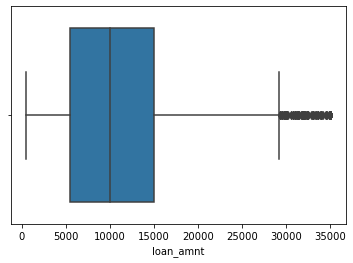

In [50]:
sns.boxplot(df.loan_amnt)

In [51]:
df.total_pymnt.describe()

count    35482.000000
mean     11990.953179
std       8821.931980
min          0.000000
25%       5590.586144
50%       9831.873129
75%      16276.470465
max      58563.679930
Name: total_pymnt, dtype: float64

<AxesSubplot:xlabel='total_pymnt'>

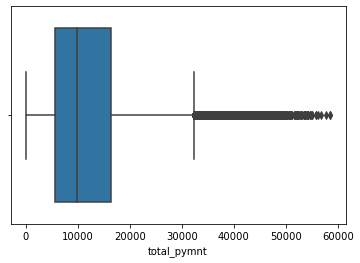

In [52]:
sns.boxplot(df.total_pymnt)

In [53]:
#Removing the outliers 99 percentile from annual income

In [56]:
df=df[df['annual_inc']<df['annual_inc'].quantile(0.99)]
df['annual_inc'].describe()

count     34773.000000
mean      64244.525721
std       31667.757150
min        4000.000000
25%       40944.000000
50%       58000.000000
75%       80000.000000
max      182496.000000
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

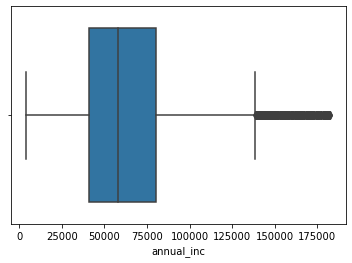

In [57]:
sns.boxplot(df.annual_inc)

Univariate Analysis loan status among the applicants

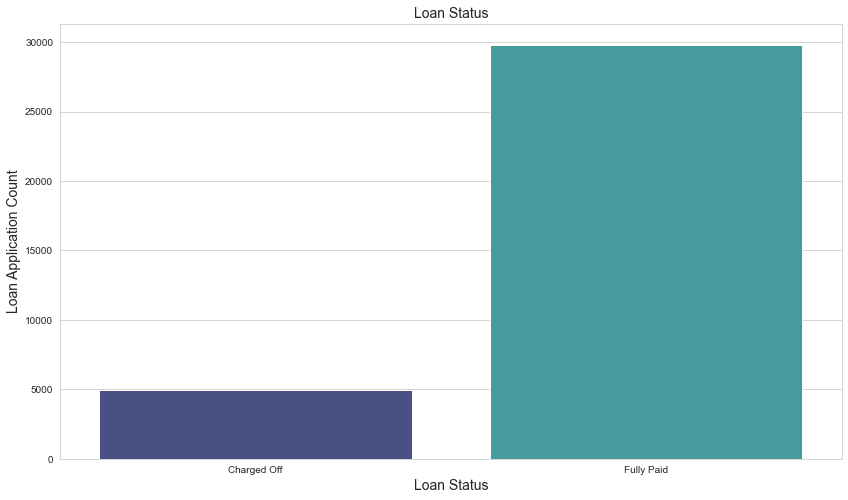

In [77]:
plt.figure(figsize=(14,8),facecolor='w')
sns.set_style("whitegrid")
ls = sns.countplot(x="loan_status",data=df,palette='mako')
ls.set_title('Loan Status',fontsize=14)
ls.set_xlabel('Loan Status',fontsize=14)
ls.set_ylabel('Loan Application Count',fontsize=14)            
plt.show()

Univariate Analysis Purpose of Loan with loan status among the applicants

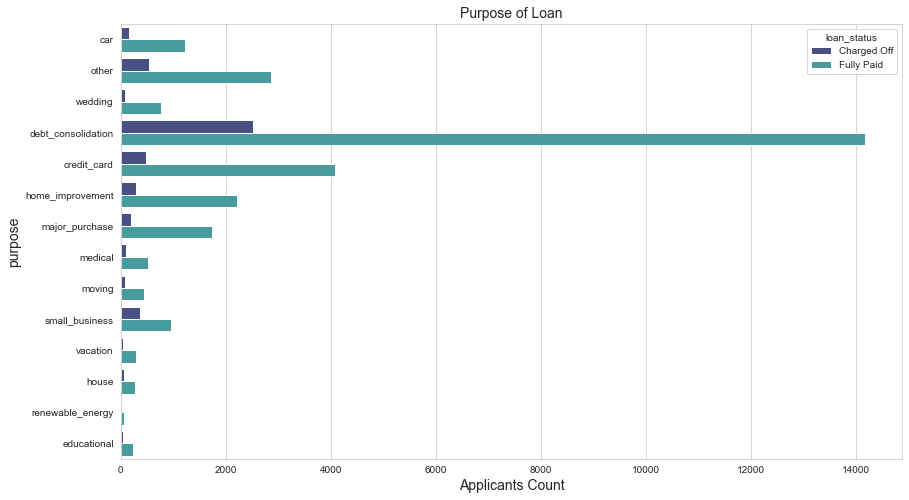

In [71]:
plt.figure(figsize=(14,8), facecolor ='w')
sns.set_style("whitegrid")
ls_p = sns.countplot(y='purpose', data=df, hue='loan_status', palette= 'mako')
ls_p.set_title('Purpose of Loan', fontsize=14)
ls_p.set_ylabel('purpose', fontsize=14)
ls_p.set_xlabel('Applicants Count', fontsize=14)
plt.show()

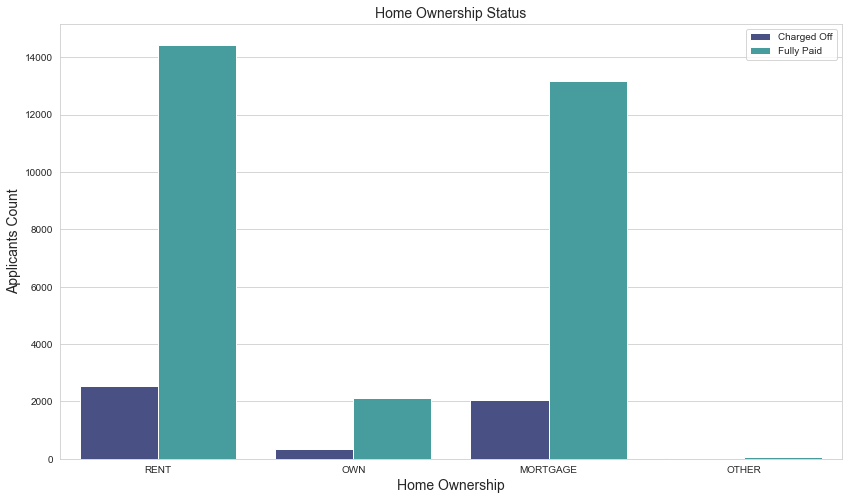

In [78]:
plt.figure(figsize=(14,8), facecolor ='w')
sns.set_style("whitegrid")
ls_h = sns.countplot(x='home_ownership', data=df, hue='loan_status', palette= 'mako')
ls_h.legend(bbox_to_anchor=(1,1))
ls_h.set_title('Home Ownership Status', fontsize=14)
ls_h.set_xlabel('Home Ownership', fontsize=14)
ls_h.set_ylabel('Applicants Count', fontsize=14)
plt.show()

Univariate Analysis Loan issues year with loan status among the applicants

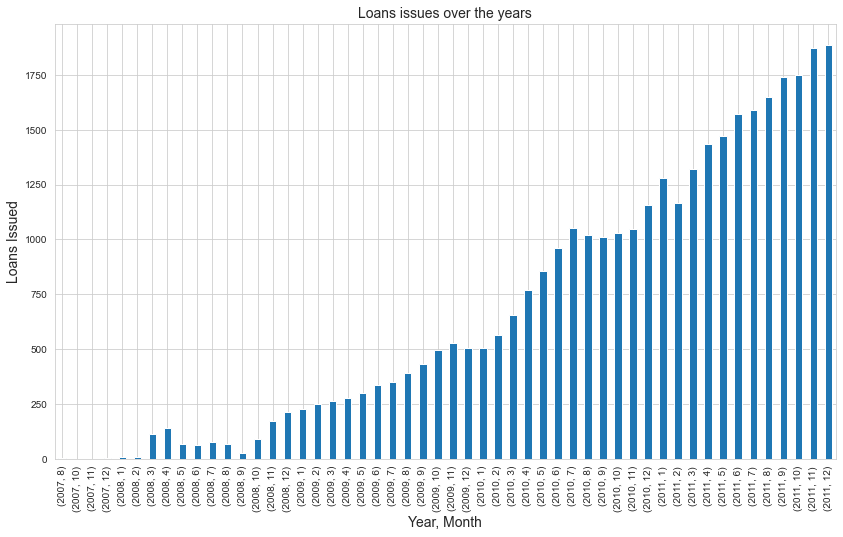

In [84]:
plt.figure(figsize=(14,8), facecolor ='w')
df.groupby(['year','month']).loan_amnt.count().plot(kind='bar')
plt.title('Loans issues over the years', fontsize=14)
plt.xlabel('Year, Month', fontsize=14)
plt.ylabel('Loans Issued', fontsize=14)
plt.show()

Univariate Analysis Payment Term with loan status among the applicants

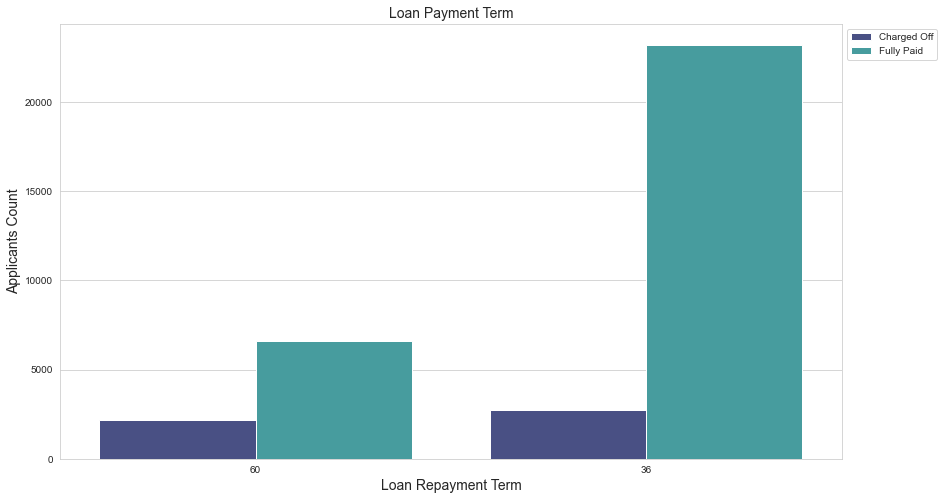

In [85]:
plt.figure(figsize=(14,8), facecolor ='w')
sns.set_style("whitegrid")
ls_t = sns.countplot(x='term', data=df, hue='loan_status', palette= 'mako')
ls_t.legend(bbox_to_anchor=(1,1))
ls_t.set_title('Loan Payment Term', fontsize=14)
ls_t.set_xlabel('Loan Repayment Term', fontsize=14)
ls_t.set_ylabel('Applicants Count', fontsize=14)
plt.show()

Bivariate Analysis 